# Identifying Duplicate Questions

Over 100 million people visit Quora every month, so it's no surprise that many people ask similar (or the same) questions. Various questions with the same intent can cause people to spend extra time searching for the best answer to their question, and results in members answering multiple versions of the same question. Quora uses random forest to identify duplicated questions to provide a better experience to active seekers and writers, and offer more value to both of these groups in the long term.
Follow the steps outlined below to build the appropriate classifier model. 


Steps:
- Download data
- Exploration
- Cleaning
- Feature Engineering
- Modeling

By the end of this project you should have **a presentation that describes the model you built** and its **performance**. 


In [75]:
import pandas as pd
import pandas as pd
import sys
sys.path.append(r"C:\Users\silvh\OneDrive\lighthouse\custom_python")
from silvhua import *
from silvhua_plot import *


In [6]:
df = pd.read_csv("./train.csv") #.sample(1000, random_state=0)
df

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0
...,...,...,...,...,...,...
404285,404285,433578,379845,How many keywords are there in the Racket prog...,How many keywords are there in PERL Programmin...,0
404286,404286,18840,155606,Do you believe there is life after death?,Is it true that there is life after death?,1
404287,404287,537928,537929,What is one coin?,What's this coin?,0
404288,404288,537930,537931,What is the approx annual cost of living while...,I am having little hairfall problem but I want...,0


#### Note
There is no designated test.csv file. The train.csv file is the entire dataset. Part of the data in the train.csv file should be set aside to act as the final testing data.

# Exploration

In [7]:
df['is_duplicate'].value_counts()

0    255027
1    149263
Name: is_duplicate, dtype: int64

In [9]:
# No exact duplicates
df[df['question1'] == df['question2']]

,id,qid1,qid2,question1,question2,is_duplicate


# *Train test split*

In [8]:
# Account for imbalance in data set

from sklearn.model_selection import train_test_split
df_train_0, df_test_0 = train_test_split(df[df['is_duplicate'] == 0], train_size=0.8,random_state=0)
df_train_1, df_test_1 = train_test_split(df[df['is_duplicate'] == 1], train_size=0.8,random_state=0)

print(df_train_0.shape)
print(df_test_0.shape)
print(df_train_1.shape)
print(df_test_1.shape)

(204021, 6)
(51006, 6)
(119410, 6)
(29853, 6)


In [9]:
df_train = pd.concat([df_train_0, df_train_1]).sample(frac=1)
df_test = pd.concat([df_test_0, df_test_1]).sample(frac=1)
y_train = df_train['is_duplicate']
y_test = df_test['is_duplicate']

# Make sure no rows got dropped
print(len(df_train)+len(df_test)==len(df))
df_test.head()

True


,id,qid1,qid2,question1,question2,is_duplicate
364700,364700,21876,12718,Can I earn money online?,How do I earn money from the Internet?,1
396364,396364,529429,529430,What are the freakiest anomalies ever know?,Can I take an Uber from tampa FL to Atlanta ga?,0
263385,263385,379928,379929,How big is the destruction radius of a 48N6E2 ...,What is the age limit for digital marketing co...,0
186376,186376,157063,171231,How do I log out on Quora?,How do I log out from Qoura?,1
331383,331383,25073,193503,What are the top 10 most profitable businesses...,What are some all-time profitable businesses i...,0


# Cleaning

- Tokenization
- Stopwords cleaning
- Removing punctuation
- Normalizing
- Stemming

# Feature Engineering

- tf-idf
- word2vec
- word count
- number of the same words in both questions
- ....

## *Forest Models*

In [138]:
import timeit

In [21]:
# Take a subsample to test word processing functions
df.loc[0:2,['question1', 'question2']]

,question1,question2
0,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...
1,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...
2,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...


In [222]:
# 2022-11-17 9:05 Attempt with a single call of .apply; no
# from nltk.tokenize import word_tokenize
# import string
# from nltk.corpus import stopwords
# from nltk.stem.porter import PorterStemmer
# from nltk.stem import WordNetLemmatizer

# def process_doc(doc):
    
#     values = doc
#     # print(type(doc))
#     print(values,'\n\n')
#     # # remove special characters
#     # doc = ''.join([char for char in doc if not char in string.punctuation])

#     # # Split text into single words (also gets rid of extra white spaces)
#     # words = word_tokenize(doc)

#     # # Convert to lower case
#     # words = [word.lower() for word in words]
    
#     # # # Remove stop words aside from the 5 why's + how
#     # stop_words = set(stopwords.words('english')) - set(['who', 'what', 'where', 'when', 'how', 'why'])
#     # words = [w for w in words if not w in stop_words]

#     # # Stem
#     # # porter = PorterStemmer()
#     # # words = [porter.stem(word) for word in words]
#     # wnl = WordNetLemmatizer()
#     # words = [wnl.lemmatize(word) for word in words]

#     # return words

# # %%timeit
# def process_pairs(df):
#     df = df.apply(lambda x: process_doc(x))

#     # return df


# process_pairs(df.loc[0:1])

In [ ]:

from nltk.tokenize import word_tokenize
import string
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [293]:
set(stopwords.words('english')) - set(['who', 'what', 'where', 'when', 'how', 'why'])

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 're',
 's'

In [25]:
# # 2022-11-17 8:49 multiple .apply
# from nltk.tokenize import word_tokenize
# import string
# from nltk.corpus import stopwords
# from nltk.stem.porter import PorterStemmer
# from nltk.stem import WordNetLemmatizer

# def process_doc(doc):
    

#     # remove special characters
#     doc = ''.join([char for char in str(doc) if not char in string.punctuation])

#     # Split text into single words (also gets rid of extra white spaces)
#     words = word_tokenize(doc)

#     # Convert to lower case
#     words = [word.lower() for word in words]
    
#     # # Remove stop words aside from the 5 why's + how
#     stop_words = set(stopwords.words('english')) - set(['who', 'what', 'where', 'when', 'how', 'why'])
#     words = [w for w in words if not w in stop_words]

#     # Stem
#     # porter = PorterStemmer()
#     # words = [porter.stem(word) for word in words]
#     wnl = WordNetLemmatizer()
#     words = [wnl.lemmatize(word) for word in words]
#     print(len(words))
#     df.loc[:,'words1'] = len(words)

#     return df

# # %%timeit
# def process_pairs(df):
#     df['question1'].apply(lambda x: process_doc(x))
#     # tokens2 = df['question2'].apply(lambda x: process_doc(x))

#     # df2 = pd.concat([df['is_duplicate'], 
#     #     tokens1,
#     #     tokens2
#     #     ], axis=1)

#     # df2['length_diff'] = abs(len(tokens1) - len(tokens2))

#     return df


# process_pairs(df.loc[0:2])

8
5
7


,id,qid1,qid2,question1,question2,is_duplicate,words1
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,7
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,7
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,7


In [ ]:
# 2022-11-17 16:21 with .apply() method # SH 2022-11-18 20:08 did not finish this
# %%time

def process_doc(doc):

    # remove special characters
    doc = ''.join([char for char in doc if not char in string.punctuation])

    # Split text into single words (also gets rid of extra white spaces)
    words = word_tokenize(doc)

    # Convert to lower case
    words = [word.lower() for word in words]

    # Stem
    # porter = PorterStemmer()
    # words = [porter.stem(word) for word in words]
    wnl = WordNetLemmatizer()
    words = [wnl.lemmatize(word) for word in words]

    return words


In [105]:
# Forest models
    # Data prep using .itertuples()
# %%time

def process_doc(doc):

    # remove special characters
    doc = ''.join([char for char in str(doc) if not char in string.punctuation]) ###

    # Split text into single words (also gets rid of extra white spaces)
    words = word_tokenize(doc)

    # Convert to lower case
    words = [word.lower() for word in words]

    # Stem
    # porter = PorterStemmer()
    # words = [porter.stem(word) for word in words]
    wnl = WordNetLemmatizer()
    words = [wnl.lemmatize(word) for word in words]

    return words

# feature engineering
def process_pairs(df):
    """
    Perform feature engineering on pairs of questions for forest models.
    """

    length_diff = []
    n_common_words = []
    df2 = pd.DataFrame()
    for index, q1, q2 in df[['question1', 'question2']].itertuples():
        # Preprocess
        tokens1 = process_doc(q1)
        tokens2 = process_doc(q2)
        
        print(q1)
        print(q2)
        # print(tokens1)
        # print(tokens2)
        # print()

        # Get number of words for q1 and a2 and the ratio of these values
        df2.loc[index,'Q1 length'] = len(tokens1)
        df2.loc[index,'Q2 length'] = len(tokens2)
        df2.loc[index,'length ratio'] = min([len(tokens1), len(tokens2)]) / max([len(tokens1), len(tokens2)])

        # Number of common words between q1 and q2
        common_words = set(tokens1) & set(tokens2)
        df2.loc[index,'N common words'] = len(common_words)

        # Common words between q1 and q2 as a percentage of longest question in the pair
        df2.loc[index,'common words percentage'] = len(common_words) / max([len(tokens1), len(tokens2)])
        try:
            df2.loc[index,'same last word'] = int(tokens1[-1] == tokens2[-1])
        except:
            df2.loc[index,'same last word'] = 0

        # Same frequency of the word 'not' # SH 2022-11-18 20:06 Notice that I forgot to do this for q2 and indicate match or no match
        df2.loc[index,'not_count1'] = sum(word=='not' for word in tokens1)
    
        # # Remove stop words aside from the 5 why's + how
        stop_words = set(stopwords.words('english')) - set(['who', 'what', 'where', 'when', 'how', 'why'])
        words1 = [w for w in tokens1 if not w in stop_words]
        words2 = [w for w in tokens2 if not w in stop_words]

        # Number of common words between q1 and q2 with stop words removed
        common_words_nonstop = set(words1) & set(words2)
        df2.loc[index,'N common non-stop words'] = len(common_words_nonstop)
        df2.loc[index,'common non-stop words percentage'] = len(common_words_nonstop) / max(
            [len(words1), len(words2)])
        
        # print(words2,'\n')
        
    # length difference
    df2['Q1 Q1 length difference'] = abs(df2['Q1 length'] - df2['Q2 length'])

    return df2
        

# X_train = process_pairs(df_train)

In [321]:
process_pairs(df.loc[40:50])

['why', 'do', 'slav', 'squat']
['will', 'squat', 'make', 'my', 'leg', 'thicker']

['when', 'can', 'i', 'expect', 'my', 'cognizant', 'confirmation', 'mail']
['when', 'can', 'i', 'expect', 'cognizant', 'confirmation', 'mail']

['can', 'i', 'make', '50000', 'a', 'month', 'by', 'day', 'trading']
['can', 'i', 'make', '30000', 'a', 'month', 'by', 'day', 'trading']

['is', 'being', 'a', 'good', 'kid', 'and', 'not', 'being', 'a', 'rebel', 'worth', 'it', 'in', 'the', 'long', 'run']
['is', 'being', 'bored', 'good', 'for', 'a', 'kid']

['what', 'university', 'doe', 'rexnord', 'recruit', 'new', 'grad', 'from', 'what', 'major', 'are', 'they', 'looking', 'for']
['what', 'university', 'doe', 'bg', 'food', 'recruit', 'new', 'grad', 'from', 'what', 'major', 'are', 'they', 'looking', 'for']

['what', 'is', 'the', 'quickest', 'way', 'to', 'increase', 'instagram', 'follower']
['how', 'can', 'we', 'increase', 'our', 'number', 'of', 'instagram', 'follower']

['how', 'did', 'darth', 'vader', 'fought', 'darth

,Q1 length,Q2 length,length ratio,N common words,common words percentage,same last word,not_count1,N common non-stop words,common non-stop words percentage,Q1 Q1 length difference
40,4.0,6.0,0.666667,1.0,0.166667,0.0,0.0,1.0,0.250000,2.0
41,8.0,7.0,0.875000,7.0,0.875000,1.0,0.0,5.0,1.000000,1.0
42,9.0,9.0,1.000000,8.0,0.888889,1.0,0.0,4.0,0.800000,0.0
43,16.0,7.0,0.437500,5.0,0.312500,0.0,1.0,2.0,0.333333,9.0
44,14.0,15.0,0.933333,12.0,0.800000,1.0,0.0,8.0,0.727273,1.0
45,9.0,9.0,1.000000,3.0,0.333333,1.0,0.0,3.0,0.500000,0.0
46,11.0,9.0,0.818182,0.0,0.000000,0.0,0.0,0.0,0.000000,2.0
47,24.0,12.0,0.500000,3.0,0.125000,0.0,0.0,0.0,0.000000,12.0
48,13.0,10.0,0.769231,8.0,0.615385,1.0,0.0,4.0,0.666667,3.0
49,5.0,4.0,0.800000,3.0,0.600000,1.0,0.0,3.0,1.000000,1.0


In [106]:
pd.concat([
    df[['question1', 'question2']].head(3),
    process_pairs(df.head(3))
], axis=1)

What is the step by step guide to invest in share market in india?
What is the step by step guide to invest in share market?
What is the story of Kohinoor (Koh-i-Noor) Diamond?
What would happen if the Indian government stole the Kohinoor (Koh-i-Noor) diamond back?
How can I increase the speed of my internet connection while using a VPN?
How can Internet speed be increased by hacking through DNS?


,question1,question2,Q1 length,Q2 length,length ratio,N common words,common words percentage,same last word,not_count1,N common non-stop words,common non-stop words percentage,Q1 Q1 length difference
0,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,14.0,12.0,0.857143,11.0,0.785714,0.0,0.0,6.0,0.750000,2.0
1,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,8.0,13.0,0.615385,4.0,0.307692,0.0,0.0,3.0,0.300000,5.0
2,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,14.0,10.0,0.714286,4.0,0.285714,0.0,0.0,3.0,0.428571,4.0


In [108]:
process_pairs(df.head(3))

What is the step by step guide to invest in share market in india?
What is the step by step guide to invest in share market?
What is the story of Kohinoor (Koh-i-Noor) Diamond?
What would happen if the Indian government stole the Kohinoor (Koh-i-Noor) diamond back?
How can I increase the speed of my internet connection while using a VPN?
How can Internet speed be increased by hacking through DNS?


,Q1 length,Q2 length,length ratio,N common words,common words percentage,same last word,not_count1,N common non-stop words,common non-stop words percentage,Q1 Q1 length difference
0,14.0,12.0,0.857143,11.0,0.785714,0.0,0.0,6.0,0.750000,2.0
1,8.0,13.0,0.615385,4.0,0.307692,0.0,0.0,3.0,0.300000,5.0
2,14.0,10.0,0.714286,4.0,0.285714,0.0,0.0,3.0,0.428571,4.0


In [328]:
from sklearn.base import BaseEstimator
from sklearn.linear_model import LogisticRegression

class ClfSwitcher(BaseEstimator):
# Create a class named ClfSwitcher which inherits the base class called BaseEstimator from sklearn.
    def __init__(self, estimator = LogisticRegression()):
            self.estimator = estimator # receives an estimator (model) as an input
            
    def fit(self, X, y=None, **kwargs):
            self.estimator.fit(X, y)
            return self
            
    def predict(self, X, y=None):
            return self.estimator.predict(X)
            
    def predict_proba(self, X):
            return self.estimator.predict_proba(X)
            
    def score(self, X, y):
            return self.estimator.score(X, y)

In [350]:

from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

forest_pipe = Pipeline([
    ('process_pairs', FunctionTransformer(process_pairs)),
    ('model', ClfSwitcher())
])
# forest_pipe.fit_transform(df.head()) # This line works before the modeling step
grid_params = [
    # { 
    #     'model__estimator': [LogisticRegression(random_state=0)],
    #     'model__estimator__class_weight': [None, 'balanced']
    #     },
    {
        'model__estimator': [SVC(random_state=0)],
        'model__estimator__class_weight': [None, 'balanced']
        },
    {
        'model__estimator': [xgb.XGBClassifier(random_state=0)],
        'model__estimator__n_estimators': [100, 150, 200]
        },
    {
        'model__estimator': [RandomForestClassifier(random_state=0)],
        'model__estimator__n_estimators': [100, 150, 200]
        },
    ]
gs = GridSearchCV(forest_pipe, grid_params, scoring='accuracy')
y_pred_train = gs.fit(X_train, y_train)
# print(gs.best_estimator_)
print(gs.best_params_) # 2022-11-17 11:56 works for predictions

Pipeline(steps=[('process_pairs',
                 FunctionTransformer(func=<function process_pairs at 0x00000291C62F2F70>)),
                ('model',
                 ClfSwitcher(estimator=RandomForestClassifier(n_estimators=150,
                                                              random_state=0)))])
{'model__estimator': RandomForestClassifier(n_estimators=150, random_state=0), 'model__estimator__n_estimators': 150}


In [344]:
print(list(df.head(20)['is_duplicate']))
print(y_pred)

[0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0]
[0 0 0 0 0 1 0 1 0 0 0 1 1 1 0 1 1 0 1 0]


# *Data exploration*

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt

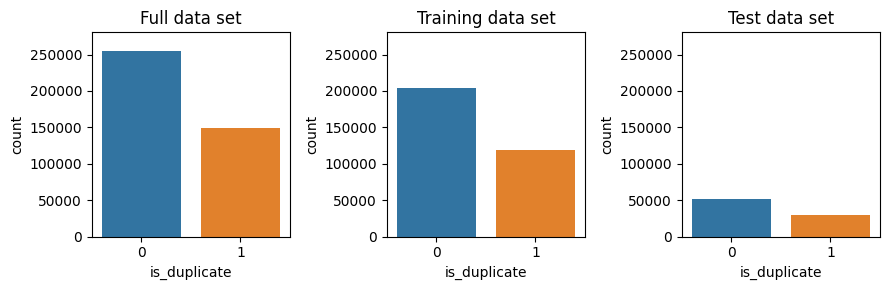

In [90]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(9, 3))

ymax = round(len(df[df['is_duplicate'] == 0])*1.10)
ax[0].set_ylim([0,ymax])
sns.countplot(data = df, x='is_duplicate', ax=ax[0])
ax[0].set_title('Full data set')
ax[1].set_ylim([0,ymax])
sns.countplot(data = df_train, x='is_duplicate', ax=ax[1])
ax[1].set_title('Training data set')
sns.countplot(data = df_test, x='is_duplicate', ax=ax[2])
ax[2].set_title('Test data set')
ax[2].set_ylim([0,ymax])
plt.tight_layout()

# Modeling

Different modeling techniques can be used:

- logistic regression
- XGBoost
- LSTMs
- etc

In [78]:
from sklearn.base import BaseEstimator
from sklearn.linear_model import LogisticRegression
class ClfSwitcher(BaseEstimator):
# Create a class named ClfSwitcher which inherits the base class called BaseEstimator from sklearn.
    def __init__(self, estimator = LogisticRegression()):
            self.estimator = estimator # receives an estimator (model) as an input
            
    def fit(self, X, y=None, **kwargs):
            self.estimator.fit(X, y)
            return self
            
    def predict(self, X, y=None):
            return self.estimator.predict(X)
            
    def predict_proba(self, X):
            return self.estimator.predict_proba(X)
            
    def score(self, X, y):
            return self.estimator.score(X, y)

In [79]:
gs6 = loadpickle('grid_search6_result2022-11-18_1955', r'C:\Users\silvh\OneDrive\lighthouse\projects\mini-project-V')
gs6

C:\Users\silvh\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:329: UserWarning:

Trying to unpickle estimator DecisionTreeClassifier from version 1.0.2 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations

C:\Users\silvh\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:329: UserWarning:

Trying to unpickle estimator RandomForestClassifier from version 1.0.2 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations

C:\Users\silvh\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:329: UserWarning:

Trying to unpickle estimator Pipeline from version 1.0.2 when using version 1.1.2. This might lead to breaking code or i

GridSearchCV(estimator=Pipeline(steps=[('features', SelectKBest(k=8)),
                                       ('model',
                                        ClfSwitcher(estimator=RandomForestClassifier(max_features='auto')))]),
             param_grid={'features__k': [8, 9, 10],
                         'model__estimator': [RandomForestClassifier(class_weight='balanced',
                                                                     max_features='auto',
                                                                     min_samples_leaf=5,
                                                                     n_estimators=150,
                                                                     random_state=0)],
                         'model__estimator__class_weight': [None, 'balanced'],
                         'model__estimator__min_samples_leaf': [3, 4, 5],
                         'model__estimator__n_estimators': [100, 150]},
             scoring='f1')

# Upsample

In [29]:
len(df_duplicate)/len(df_not_duplicate)

0.5852831268846044

In [26]:
df_duplicate = df[df['is_duplicate'] == 1]
df_not_duplicate = df[df['is_duplicate'] == 0]
print(df_duplicate.shape)
print(df_not_duplicate.shape)

(149263, 7)
(255027, 7)


In [53]:
ratio = 0.5852831268846044
train_length = 200000
test_length = 20000
df_duplicate_train, df_duplicate_test = train_test_split(df_duplicate, 
    train_size=int(train_length/2))
df_not_duplicate_train, df_not_duplicate_test = train_test_split(df_not_duplicate, 
    train_size=len(df_duplicate_train))
print(f'duplicate train shape: {df_duplicate_train.shape}')
print(f'duplicate test shape: {df_duplicate_test.shape}')


df_train_balanced = pd.concat([
    df_duplicate_train,
    df_not_duplicate_train
])
df_test_balanced = pd.concat([
    df_duplicate_test.sample(round(test_length*(1-ratio))),
    df_not_duplicate_test.sample(round(test_length*ratio))
])
print('')
print('overall train shape: ',df_train_balanced.shape)
print('overall test shape: ',df_test_balanced.shape)
print('')
print('original train shape: ',df_train.shape)
print('original test shape: ',df_test.shape)

duplicate train shape: (100000, 7)
duplicate test shape: (49263, 7)

overall train shape:  (200000, 7)
overall test shape:  (20000, 7)

original train shape:  (323431, 6)
original test shape:  (80859, 6)


In [30]:
df_train_balanced = pd.concat([
    df_duplicate.sample(n_duplicates_train),
    df_not_duplicate.sample(n_duplicates_train)
])

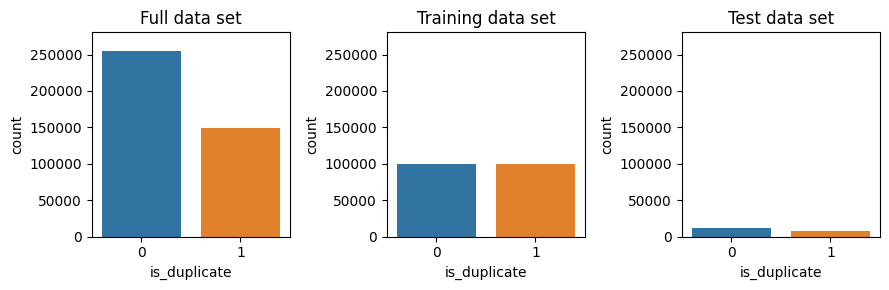

In [94]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(9, 3))

ax[0].set_ylim([0,ymax])
sns.countplot(data = df, x='is_duplicate', ax=ax[0])
ax[0].set_title('Full data set')
ax[1].set_ylim([0,ymax])
sns.countplot(data = df_train_balanced, x='is_duplicate', ax=ax[1])
ax[1].set_title('Training data set')
sns.countplot(data = df_test_balanced, x='is_duplicate', ax=ax[2])
ax[2].set_title('Test data set')
ax[2].set_ylim([0,ymax])
plt.tight_layout()

In [98]:
print(df_duplicate_train.iloc[0]['question1'])
print(df_duplicate_train.iloc[0]['question2'])

What is the best way to remove super glue from metal?
How do you dissolve super glue residue from metal?


In [99]:
print(df_not_duplicate_train.iloc[0]['question1'])
print(df_not_duplicate_train.iloc[0]['question2'])

What are the health benefits of calamansi juice?
What are the health benefits of orange juice?


In [109]:
process_pairs(df_duplicate.head(1))

Astrology: I am a Capricorn Sun Cap moon and cap rising...what does that say about me?
I'm a triple Capricorn (Sun, Moon and ascendant in Capricorn) What does this say about me?


,Q1 length,Q2 length,length ratio,N common words,common words percentage,same last word,not_count1,N common non-stop words,common non-stop words percentage,Q1 Q1 length difference
5,16.0,16.0,1.0,9.0,0.5625,1.0,0.0,5.0,0.5,0.0


In [114]:
process_pairs(df_not_duplicate.head(1))

What is the step by step guide to invest in share market in india?
What is the step by step guide to invest in share market?


,Q1 length,Q2 length,length ratio,N common words,common words percentage,same last word,not_count1,N common non-stop words,common non-stop words percentage,Q1 Q1 length difference
0,14.0,12.0,0.857143,11.0,0.785714,0.0,0.0,6.0,0.75,2.0
